In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#feature(단맛, 아삭거림)

grape = [8,5]
fish = [2, 3]
carrot = [7,10]
orange = [7, 3]
celery = [3, 8]
cheese = [1, 1]

#label
category = ['과일', '단백질', '채소', '과일','채소', '단백질']

dan = int(input('단맛 입력(1~10):'))
asac = int(input('아삭거림 입력(1~10):'))
target = [dan, asac]

def data_set():
    dataset = np.array([grape, fish, carrot, orange, celery, cheese])
    size = len(dataset)
    class_target = np.tile(target, (size,1))
    class_category = np.array(category)
    
    return dataset, class_target, class_category

dataset, class_target, class_category = data_set()

단맛 입력(1~10):2
아삭거림 입력(1~10):5


In [3]:
class_target

array([[2, 5],
       [2, 5],
       [2, 5],
       [2, 5],
       [2, 5],
       [2, 5]])

In [4]:
class_category

array(['과일', '단백질', '채소', '과일', '채소', '단백질'], dtype='<U3')

In [39]:
def classify(dataset, class_target, class_category, k):
    # 유클리드 거리 계산
    diffMat = class_target - dataset   # 두 점의 차
    sqDiffMat = diffMat**2             # 차에 대한 제곱
    row_sum = sqDiffMat.sum(axis=1)    # 차에 대한 제곱에 대한 합
    distance = np.sqrt(row_sum)        # 차에 대한 제곱에 대한 합의 제곱근(최종거리)
    
    # 가까운 거리 오름차순 정렬
    sortDist = distance.argsort() #인덱스값을 리턴
    
    # 이웃한 k개 선정
    class_result = {}
    for i in range(k):
        c = class_category[sortDist[i]] # 가까운 순으로 정렬된 인덱스 중 k개 까지 저장
        class_result[c] = class_result.get(c, 0) + 1 # get - key로 value 찾기  있으면 0을 도출,갯수를위해 +!
        # class_result 딕셔너리 형태 '단백질' : 갯수, 
    print(class_result['단백질'])
    
    return class_result


In [40]:
k = int(input('k값 입력(1~3):'))
class_result = classify(dataset, class_target, class_category, k)  # classify()함수호출
print(class_result)

k값 입력(1~3):3
2
{'단백질': 2, '채소': 1}


In [30]:
# 분류결과 출력 함수 정의
def classify_result(class_result):
    protein = fruit = vegetable = 0
    
    for c in class_result.keys():
        if c == '단백질':
            protein = class_result[c]
        elif c =='과일':
            fruit = class_result[c]
        else :
            vegetable = class_result[c]

    if protein > fruit and protein > vegetable:
        result = "분류대상은 단백질 입니다."
    elif fruit > protein and fruit > vegetable:
        result = "분류대상은 과일 입니다"
    else:
        result = "분류대상은 채소 입니다."
        
    return result


a = classify_result(class_result)
print(a)

분류대상은 단백질 입니다.


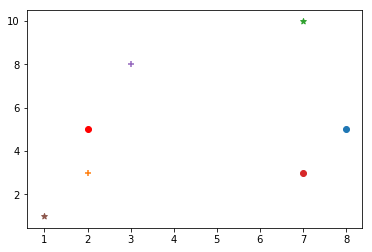

In [32]:
# 시각화(o= 과일, +=단밸질, *=채소
plt.scatter(8, 5, marker='o')
plt.scatter(2, 3, marker='+')   
plt.scatter(7, 10, marker='*') 
plt.scatter(7, 3, marker='o')
plt.scatter(3, 8, marker='+')
plt.scatter(1, 1, marker='*')
plt.scatter(dan, asac, color='red') # 분류대상 -> B집단 

plt.show()